# Instalaçoes e bibliotecas necessárias

In [1]:
!pip install unidecode openpyxl imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 3.5 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import pandas as pd
import re
import string
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from collections import Counter

# Carregando dataset

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/MiniProjeto/dataset/CorpusTwitchVideojuegos.xlsx")
df = df[['TEXTO', 'Polaridad']].dropna()
#alterar dataset:
#df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/MiniProjeto/dataset/CorpusTwitchVideogames_Extension2024.xlsx")

# Função de pré-processamento

In [6]:
stop_words = set(stopwords.words('spanish'))
stemmer = SnowballStemmer('spanish')
tokenizer = TweetTokenizer()

In [7]:
def preprocess(text):
    text = str(text).lower()
    text = unidecode(text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = re.sub(r'\b(j[aeiou]{1,})+\b', 'jaja', text)
    text = re.sub(r'\bx[o0]+\b', 'pero', text)
    text = re.sub(r'\bxfa\b', 'por favor', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\b(streamlabs|nightbot)\b', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = tokenizer.tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Aplica o pré-processamento

In [8]:
df['clean_text'] = df['TEXTO'].apply(preprocess)

# Vetorização com TF-IDF e preparação de dados


In [9]:
y = df['Polaridad']

In [10]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**analisando distribuição**

In [12]:
print("Distribuição:", Counter(y_train))

Distribuição: Counter({'Negativo': 715, 'Positivo': 674, 'Indeterminado': 161})


#**Definindo modelos**

# Modelo treinado sem parâmetros ARTIGO

In [13]:
rfARTIGO_model = RandomForestClassifier(
    n_estimators=500,
    max_features='sqrt',
    random_state=42
)
rfARTIGO_model.fit(X_train, y_train)

#PARAMETROS ARTIGO: n_estimators=500, max_features='sqrt'
#MEUS PARAMETROS: n_estimators: 500, max_features: 'log2

RandomForestClassifier(n_estimators=500, random_state=42)

In [14]:
svmARTIGO_model = SVC(C=150, kernel='rbf', random_state=42)
svmARTIGO_model.fit(X_train, y_train)
#PARAMETROS ARTIGO: C=150, kernel='rbf'
#MEUS PARAMETROS: C=1, kernel='rbf'

SVC(C=150, random_state=42)

# Modelo treinado com parâmetros MEU GRID SEARCH

In [15]:
rfGS_model = RandomForestClassifier(
    n_estimators=500,
    max_features='log2',
    random_state=42
)
rfGS_model.fit(X_train, y_train)

#PARAMETROS ARTIGO: n_estimators=500, max_features='sqrt'
#MEUS PARAMETROS: n_estimators: 500, max_features: 'log2

RandomForestClassifier(max_features='log2', n_estimators=500, random_state=42)

In [16]:
svmGS_model = SVC(C=1, kernel='rbf', random_state=42)
svmGS_model.fit(X_train, y_train)
#PARAMETROS ARTIGO: C=150, kernel='rbf'
#MEUS PARAMETROS: C=1, kernel='rbf'

SVC(C=1, random_state=42)

# Realizando predições

In [17]:
rfARTIGO_pred = rfARTIGO_model.predict(X_test)

In [18]:
svmARTIGO_pred = svmARTIGO_model.predict(X_test)

In [19]:
rfGS_pred = rfGS_model.predict(X_test)

In [20]:
svmGS_pred = svmGS_model.predict(X_test)

# Resultados

**relatórios de classificação comparativo RANDOM FOREST**

In [21]:
print("\nCLASSIFICAÇÃO RANDOM FOREST ARTIGO")
print(classification_report(y_test, rfARTIGO_pred))

print("\nCLASSIFICAÇÃO RANDOM FOREST MEU GRID SEARCH")
print(classification_report(y_test, rfGS_pred))


CLASSIFICAÇÃO RANDOM FOREST ARTIGO
               precision    recall  f1-score   support

Indeterminado       0.67      0.16      0.26        86
     Negativo       0.58      0.81      0.68       285
     Positivo       0.72      0.60      0.66       294

     accuracy                           0.63       665
    macro avg       0.66      0.53      0.53       665
 weighted avg       0.65      0.63      0.61       665


CLASSIFICAÇÃO RANDOM FOREST MEU GRID SEARCH
               precision    recall  f1-score   support

Indeterminado       0.63      0.14      0.23        86
     Negativo       0.58      0.80      0.67       285
     Positivo       0.71      0.62      0.66       294

     accuracy                           0.63       665
    macro avg       0.64      0.52      0.52       665
 weighted avg       0.65      0.63      0.61       665



**relatórios de classificação comparativo SVM**

In [22]:
print("\nCLASSIFICAÇÃO SVM ARTIGO")
print(classification_report(y_test, svmARTIGO_pred))

print("\nCLASSIFICAÇÃO SVM MEU GRID SEARCH")
print(classification_report(y_test, svmGS_pred))


CLASSIFICAÇÃO SVM ARTIGO
               precision    recall  f1-score   support

Indeterminado       0.68      0.15      0.25        86
     Negativo       0.61      0.82      0.70       285
     Positivo       0.74      0.65      0.69       294

     accuracy                           0.66       665
    macro avg       0.68      0.54      0.55       665
 weighted avg       0.67      0.66      0.64       665


CLASSIFICAÇÃO SVM MEU GRID SEARCH
               precision    recall  f1-score   support

Indeterminado       0.80      0.09      0.17        86
     Negativo       0.58      0.88      0.70       285
     Positivo       0.78      0.58      0.66       294

     accuracy                           0.65       665
    macro avg       0.72      0.52      0.51       665
 weighted avg       0.69      0.65      0.61       665



***F1-score Random forest***

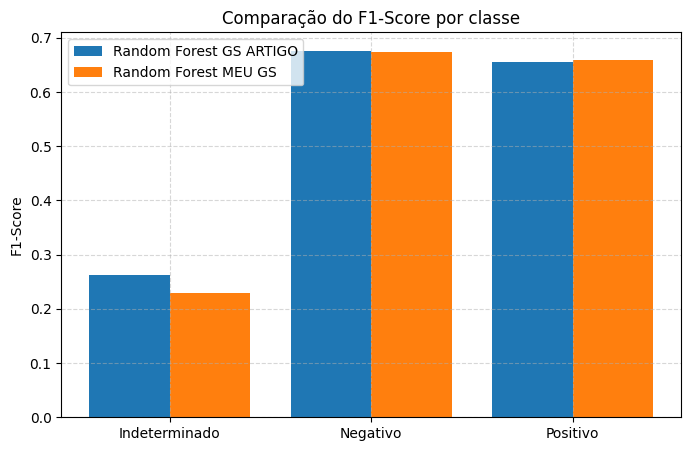

In [23]:
from sklearn.metrics import f1_score

f1_rfARTIGO = f1_score(y_test, rfARTIGO_pred, average=None)
f1_rfGS = f1_score(y_test, rfGS_pred, average=None)
classes = ['Indeterminado', 'Negativo', 'Positivo']

x = range(len(classes))
plt.figure(figsize=(8, 5))
plt.bar(x, f1_rfARTIGO, width=0.4, label='Random Forest GS ARTIGO', align='center')
plt.bar([i + 0.4 for i in x], f1_rfGS, width=0.4, label='Random Forest MEU GS', align='center')
plt.xticks([i + 0.2 for i in x], classes)
plt.ylabel('F1-Score')
plt.title('Comparação do F1-Score por classe')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

***F1-score SVM***

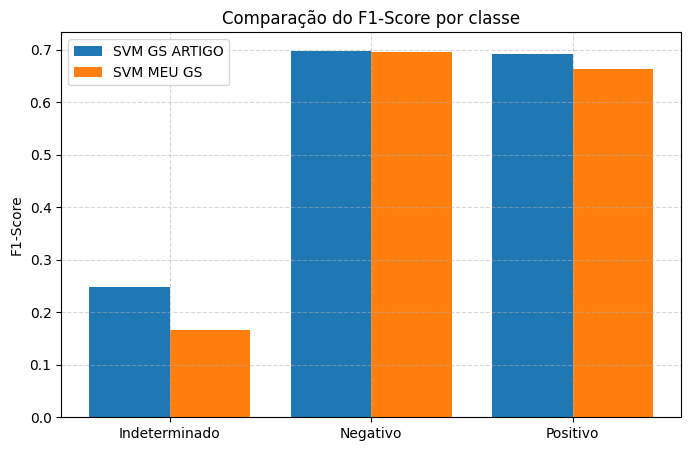

In [24]:
from sklearn.metrics import f1_score

f1_svmARTIGO = f1_score(y_test, svmARTIGO_pred, average=None)
f1_svmGS = f1_score(y_test, svmGS_pred, average=None)
classes = ['Indeterminado', 'Negativo', 'Positivo']

x = range(len(classes))
plt.figure(figsize=(8, 5))
plt.bar(x, f1_svmARTIGO, width=0.4, label='SVM GS ARTIGO', align='center')
plt.bar([i + 0.4 for i in x], f1_svmGS, width=0.4, label='SVM MEU GS', align='center')
plt.xticks([i + 0.2 for i in x], classes)
plt.ylabel('F1-Score')
plt.title('Comparação do F1-Score por classe')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Matrizes de confusão random forest**

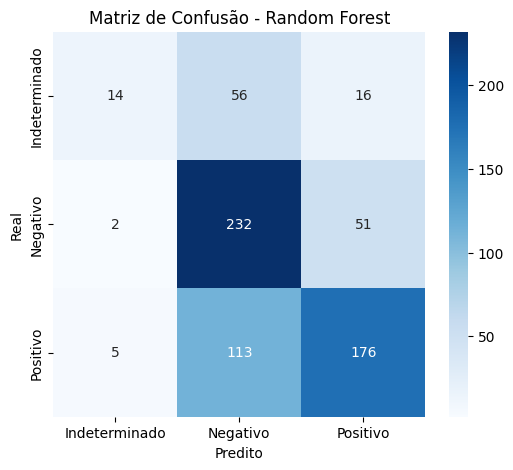

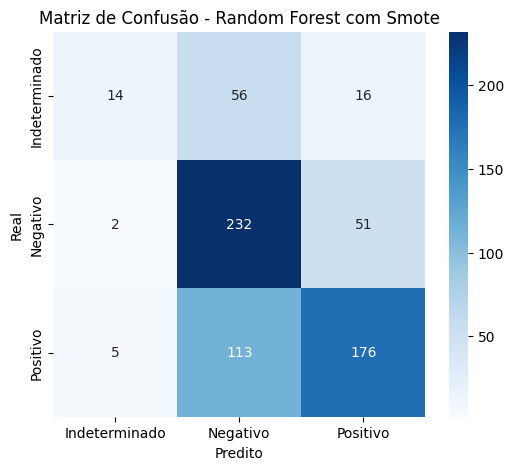

In [25]:
# Gerando matriz
cm_rfARTIGO = confusion_matrix(y_test, rfARTIGO_pred, labels=classes)
cm_rfGS = confusion_matrix(y_test, rfARTIGO_pred, labels=classes)

# Plot matriz de confusão Random Forest GS ARTIGO
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rfARTIGO, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Plot matriz de confusão Random Forest MEU GS
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rfGS, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusão - Random Forest com Smote')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

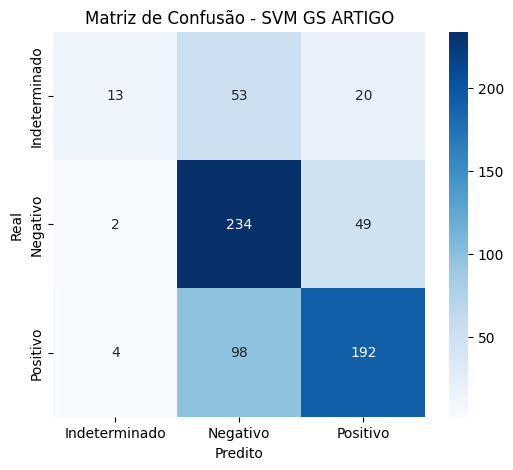

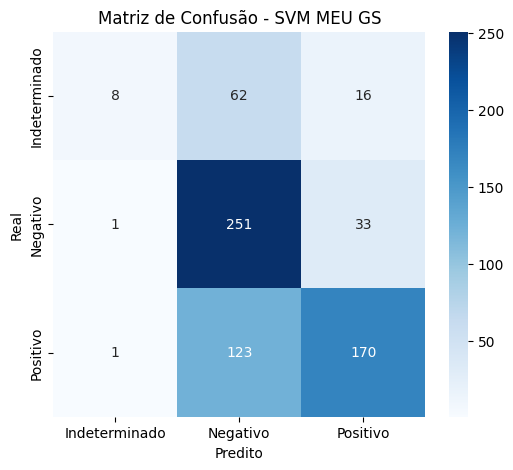

In [26]:
# Gerando matriz
cm_svmARTIGO = confusion_matrix(y_test, svmARTIGO_pred, labels=classes)
cm_svmGS = confusion_matrix(y_test, svmGS_pred, labels=classes)

# Plot matriz de confusão SVM GS ARTIGO
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svmARTIGO, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusão - SVM GS ARTIGO')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Plot matriz de confusão SVM MEU GS
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svmGS, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusão - SVM MEU GS')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()